In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel(r"C:\Users\Minfy\Downloads\Datasets\Bank_Personal_Loan_Modelling.xlsx" , sheet_name= "Data")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| ID                  | Unique identifier for the customer                                           |
| Customer ID         | Unique customer ID                                                          |
| Age                 | Customer's age in completed years                                           |
| Experience          | Number of years of professional experience                                  |
| Income              | Annual income of the customer (in $000)                                     |
| ZIPCode             | Home address ZIP code                                                       |
| Family              | Family size of the customer                                                 |
| CCAvg               | Average monthly credit card spending (in $000)                              |
| Education           | Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional)        |
| Mortgage            | Value of house mortgage if any (in $000)                                    |
| Personal Loan       | Did the customer accept the personal loan offered in the last campaign?     |
| Securities Account  | Does the customer have a securities account with the bank?                  |
| CD Account          | Does the customer have a certificate of deposit (CD) account with the bank? |
| Online              | Does the customer use internet banking facilities?                          |
| CreditCard          | Does the customer use a credit card issued by UniversalBank?                |


In [72]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [73]:
df['Personal Loan'].value_counts()
# 0 -> Non defalter
# 1 -> Defalter

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [74]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [75]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [76]:
columns = df.columns

In [77]:
def analyze_continuous(df, columns):
    for col in columns:
        print(f"\n📈 Analysis for: {col}")
        print(df[col].describe())

        # Histogram with KDE
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

        # Boxplot
        plt.figure(figsize=(6, 1))
        sns.boxplot(x=df[col], color='orange')
        plt.title(f"Boxplot of {col}")
        plt.show()



In [78]:
def analyze_categorical(df, columns):
    for col in columns:
        print(f"\n📊 Frequency for: {col}")
        print(df[col].value_counts())
        
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f"Count of {col}")
        plt.ylabel("Frequency")
        plt.xlabel(col)
        plt.show()


In [79]:
def analyze_target(df, target_col):
    print(f"\n🎯 Target Variable Distribution: {target_col}")
    print(df[target_col].value_counts(normalize=True) * 100)

    sns.countplot(x=target_col, data=df, palette='Set1')
    plt.title(f"Distribution of Target Variable: {target_col}")
    plt.ylabel("Count")
    plt.xlabel(target_col)
    plt.show()



In [80]:
def run_univariate_analysis(df):
    # Define your columns
    continuous_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
    categorical_cols = ['Family', 'Education', 'Securities Account', 
                        'CD Account', 'Online', 'CreditCard']
    target_col = 'Personal Loan'

    analyze_continuous(df, continuous_cols)
    analyze_categorical(df, categorical_cols)
    analyze_target(df, target_col)



📈 Analysis for: Age
count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


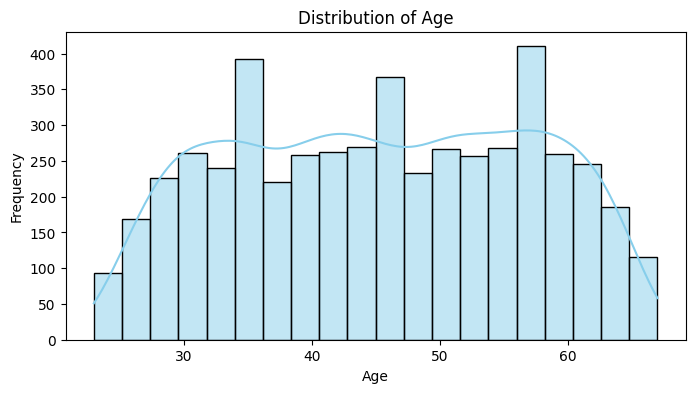

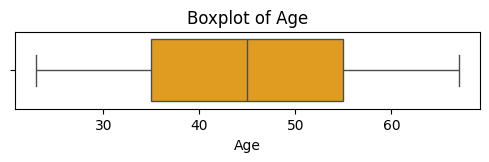


📈 Analysis for: Experience
count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


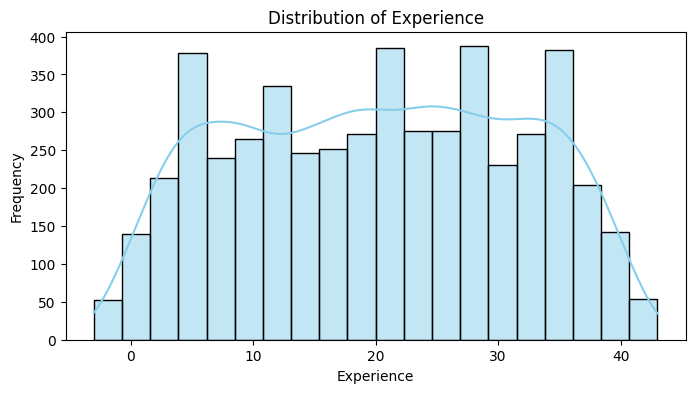

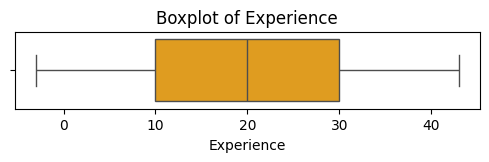


📈 Analysis for: Income
count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


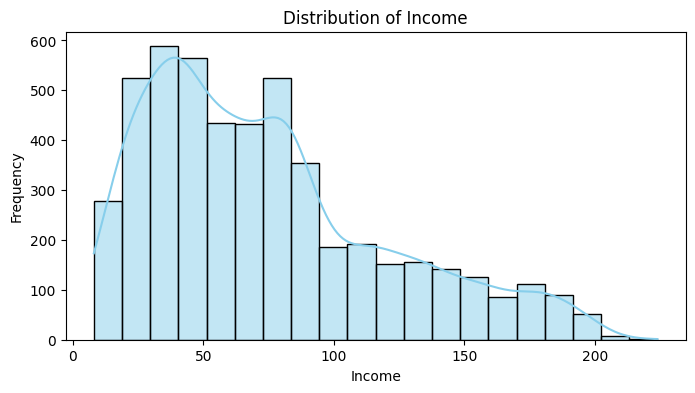

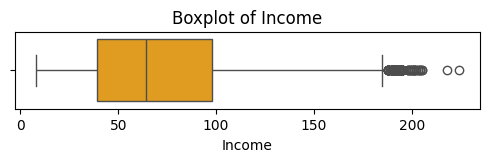


📈 Analysis for: CCAvg
count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64


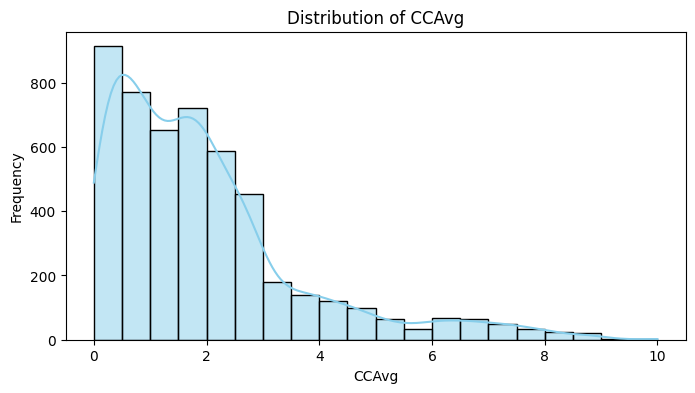

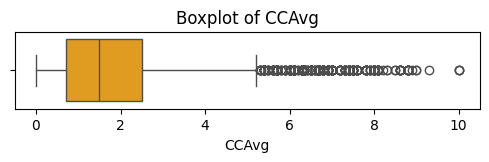


📈 Analysis for: Mortgage
count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


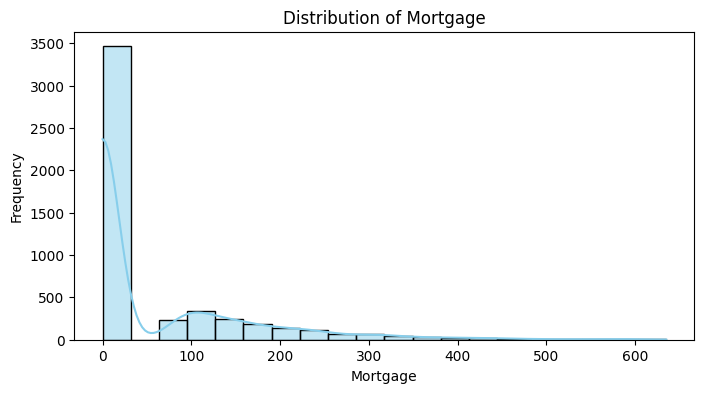

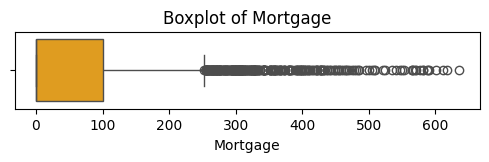


📊 Frequency for: Family
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\4264170967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


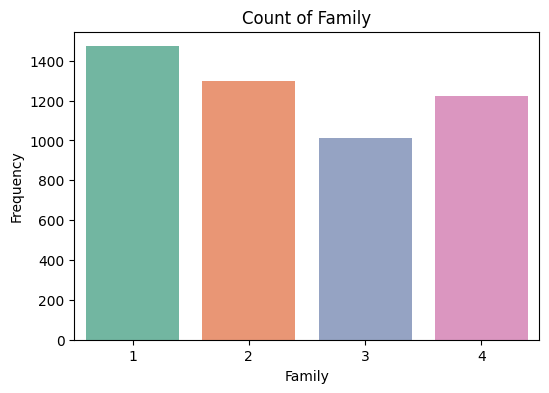


📊 Frequency for: Education
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64


C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\4264170967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


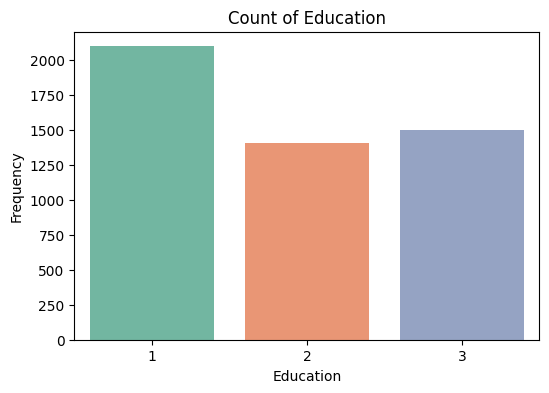


📊 Frequency for: Securities Account
Securities Account
0    4478
1     522
Name: count, dtype: int64


C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\4264170967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


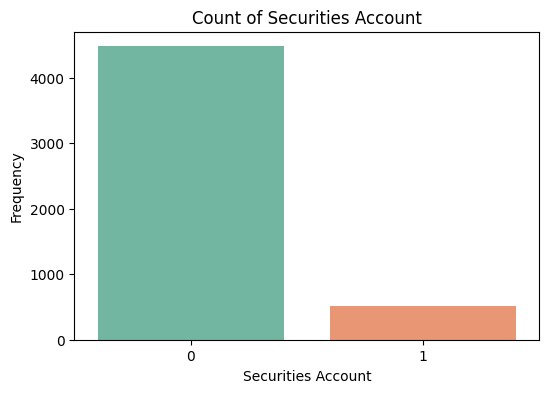


📊 Frequency for: CD Account
CD Account
0    4698
1     302
Name: count, dtype: int64


C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\4264170967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


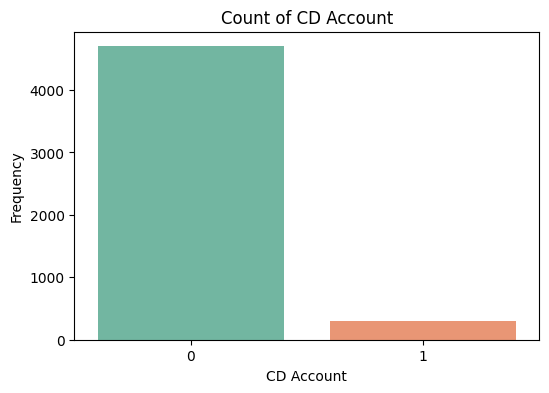


📊 Frequency for: Online
Online
1    2984
0    2016
Name: count, dtype: int64


C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\4264170967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


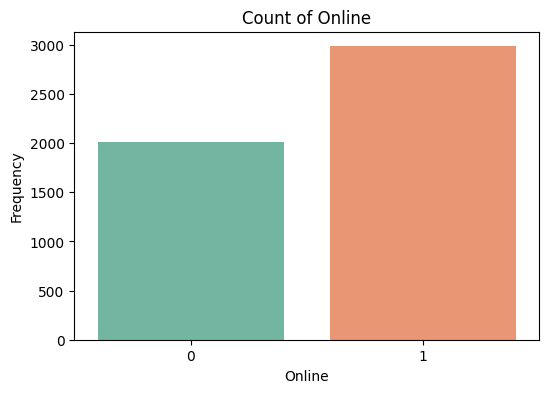


📊 Frequency for: CreditCard
CreditCard
0    3530
1    1470
Name: count, dtype: int64


C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\4264170967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


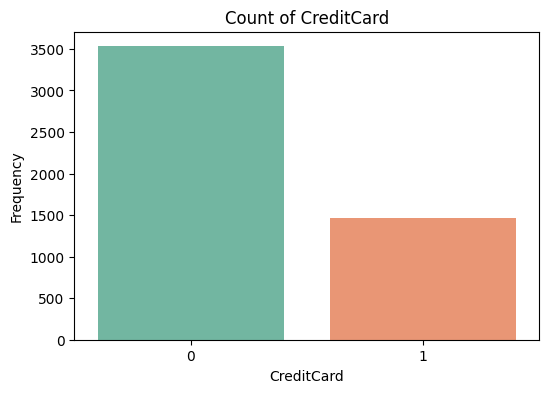


🎯 Target Variable Distribution: Personal Loan
Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\1511372381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='Set1')


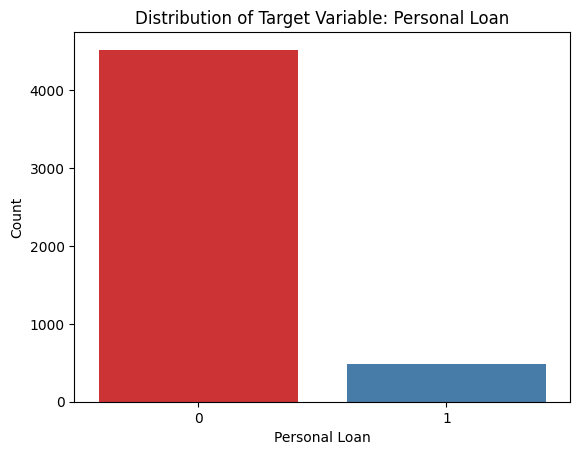

In [81]:
run_univariate_analysis(df)

In [82]:

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Generate descriptive statistics
summary_stats = numerical_df.describe().T  # Transposed for easier viewing

# Add IQR and Range
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats['Range'] = summary_stats['max'] - summary_stats['min']

# Display the result
summary_stats


,count,mean,std,min,25%,50%,75%,max,IQR,Range
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0,20.0,44.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0,20.0,46.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0,59.0,216.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0,2.0,3.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0,1.8,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0,2.0,2.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [83]:
# Count negatives before removal
print("Negative experience count before removal:", (df['Experience'] < 0).sum())

# Remove rows with negative experience
df = df[df['Experience'] >= 0]

# Confirm removal
print("Negative experience count after removal:", (df['Experience'] < 0).sum())
print("Updated dataset shape:", df.shape)


Negative experience count before removal: 52
Negative experience count after removal: 0
Updated dataset shape: (4948, 12)


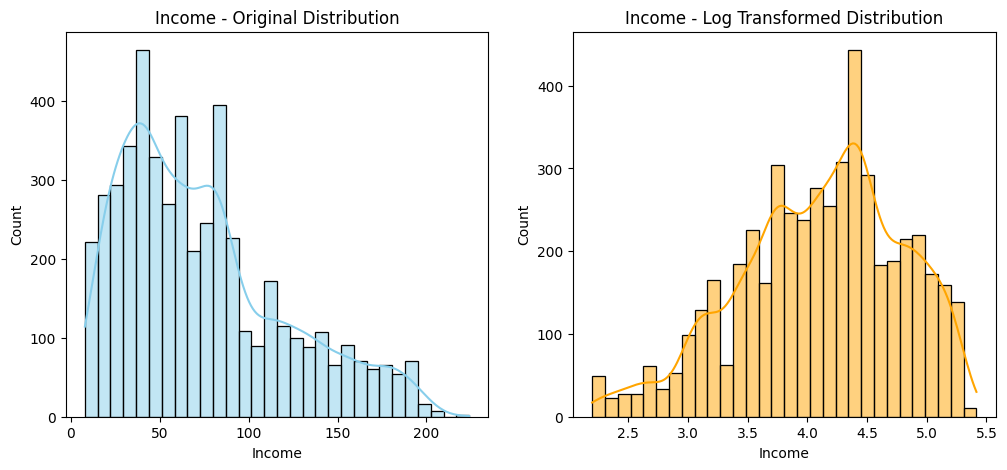

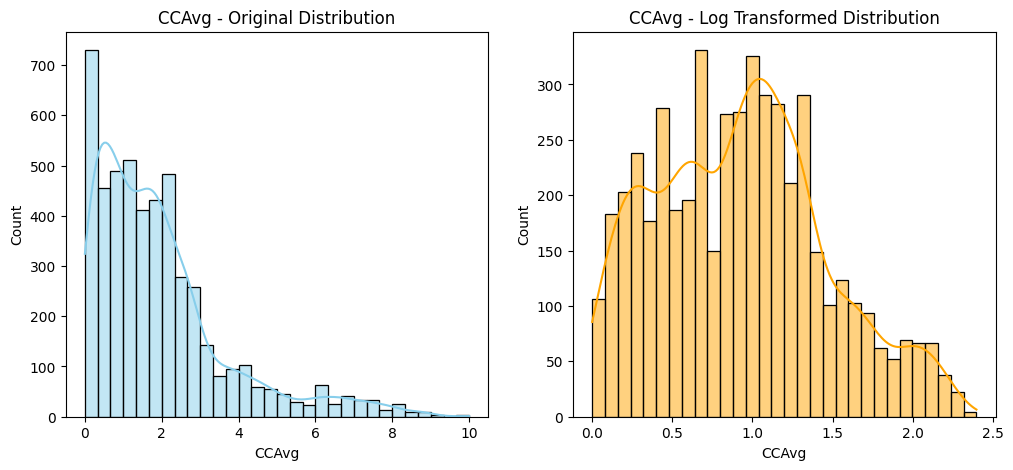

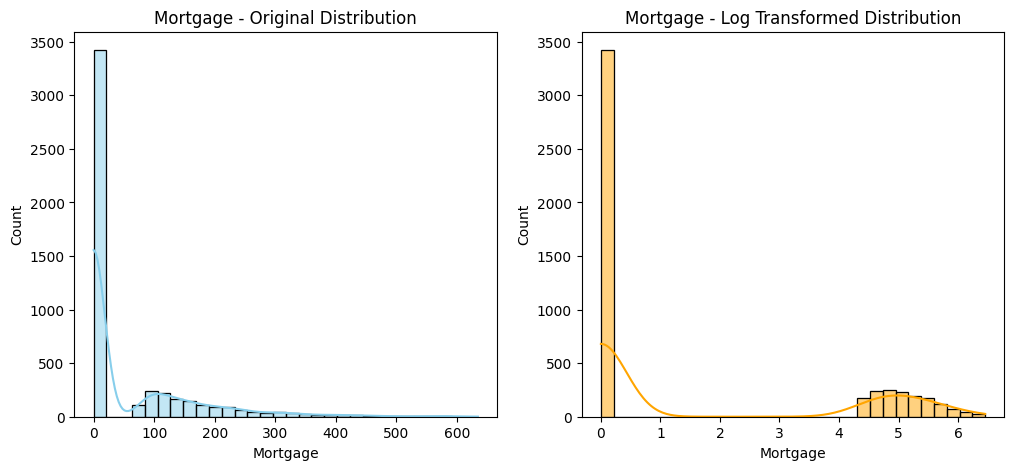

In [84]:
import numpy as np

for col in ['Income', 'CCAvg', 'Mortgage']:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col} - Original Distribution')
    
    plt.subplot(1,2,2)
    sns.histplot(np.log1p(df[col]), bins=30, kde=True, color='orange')
    plt.title(f'{col} - Log Transformed Distribution')
    
    plt.show()

    # Replace original column with log transformed version for modeling
    df[col] = np.log1p(df[col])


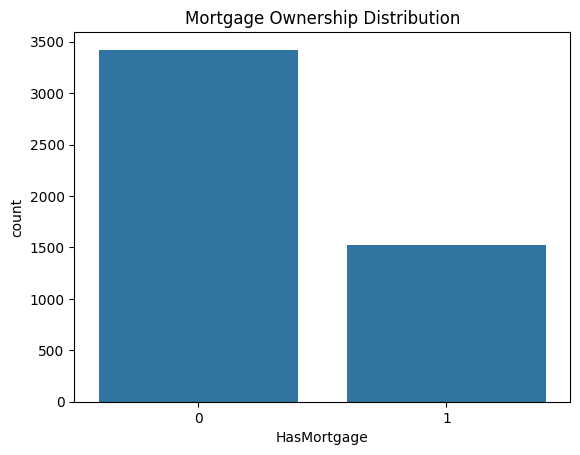

In [85]:
df['HasMortgage'] = df['Mortgage'].apply(lambda x: 1 if x > 0 else 0)

sns.countplot(x='HasMortgage', data=df)
plt.title('Mortgage Ownership Distribution')
plt.show()


C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\594298918.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
C:\Users\Minfy.DESKTOP-3E50D5N\AppData\Local\Temp\ipykernel_11052\594298918.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


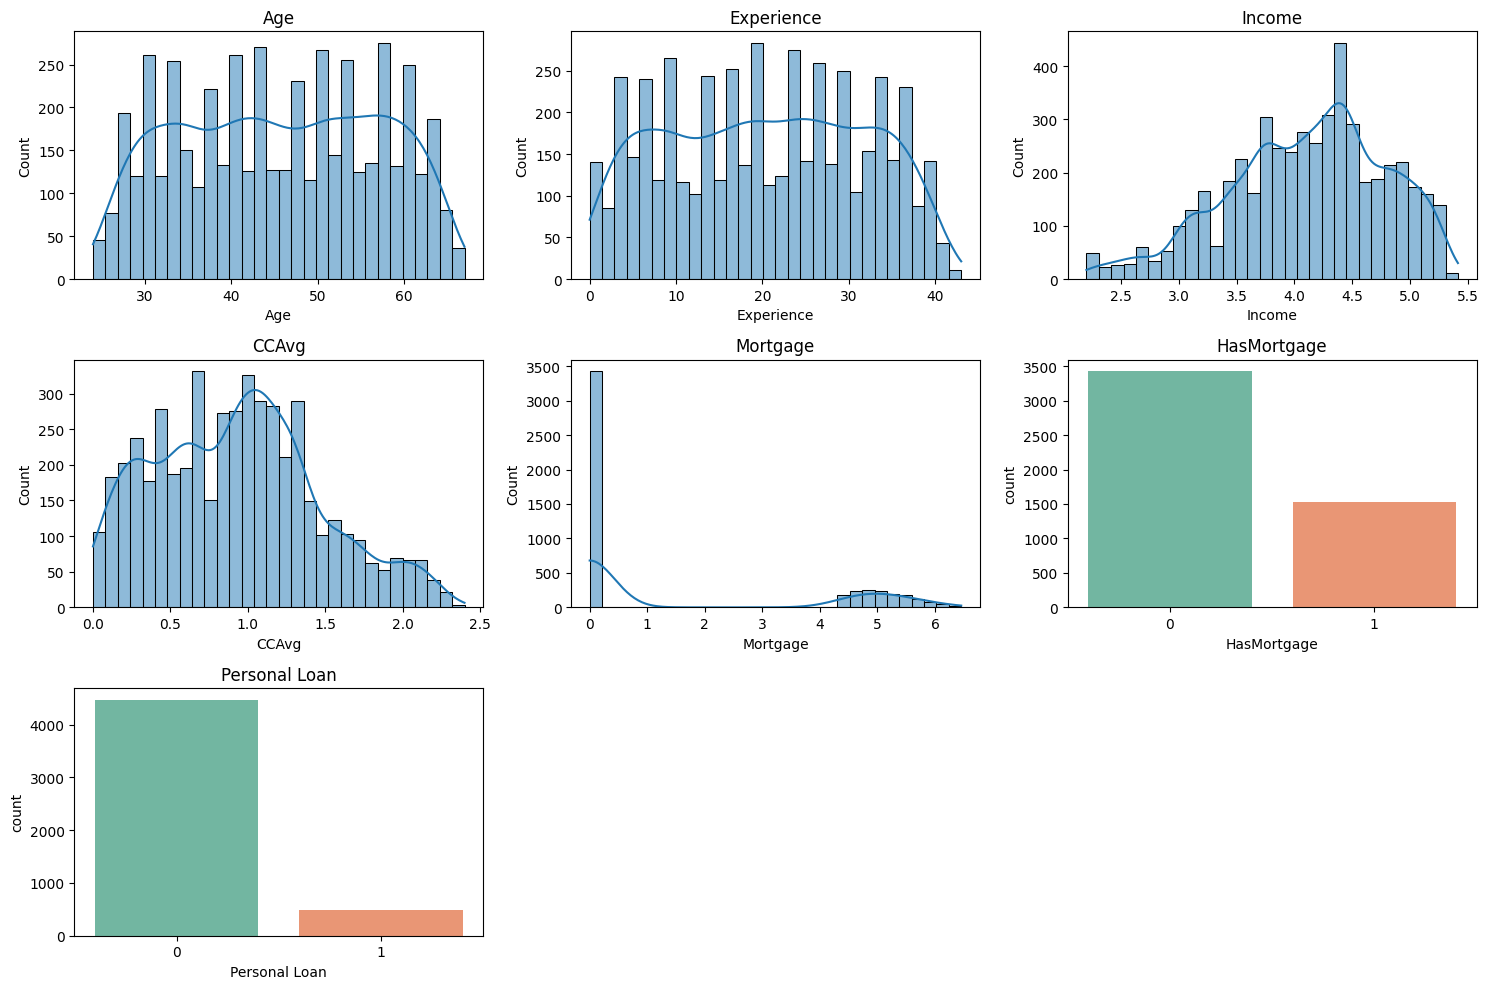

In [86]:
features_to_plot = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'HasMortgage', 'Personal Loan']

plt.figure(figsize=(15,10))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(3,3,i)
    if col == 'Personal Loan' or col == 'HasMortgage':
        sns.countplot(x=col, data=df, palette='Set2')
    else:
        sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [87]:

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Generate descriptive statistics
summary_stats = numerical_df.describe().T  # Transposed for easier viewing

# Add IQR and Range
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats['Range'] = summary_stats['max'] - summary_stats['min']

# Display the result
summary_stats

,count,mean,std,min,25%,50%,75%,max,IQR,Range
Age,4948.0,45.557195,11.320735,24.000000,36.000000,46.000000,55.000000,67.000000,19.000000,43.000000
Experience,4948.0,20.331043,11.311973,0.000000,10.750000,20.000000,30.000000,43.000000,19.250000,43.000000
Income,4948.0,4.107092,0.680509,2.197225,3.688879,4.174387,4.595120,5.416100,0.906240,3.218876
Family,4948.0,2.391471,1.148444,1.000000,1.000000,2.000000,3.000000,4.000000,2.000000,3.000000
CCAvg,4948.0,0.928333,0.533934,0.000000,0.530628,0.916291,1.280934,2.397895,0.750306,2.397895
Education,4948.0,1.878941,0.839745,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000
Mortgage,4948.0,1.571002,2.368023,0.000000,0.000000,0.000000,4.624973,6.455199,4.624973,6.455199
Personal Loan,4948.0,0.097009,0.296000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Securities Account,4948.0,0.104285,0.305660,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
CD Account,4948.0,0.061035,0.239418,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000


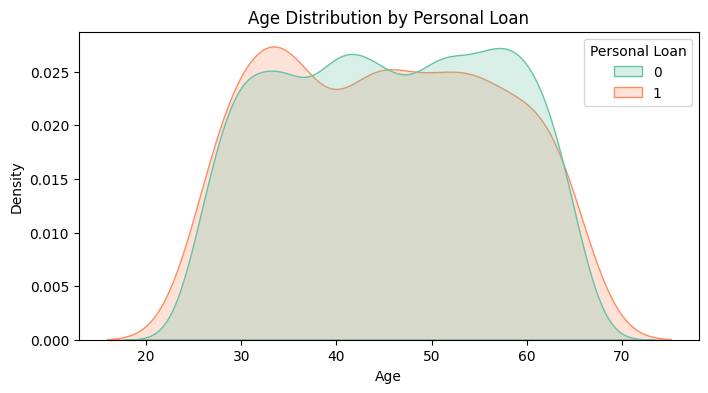

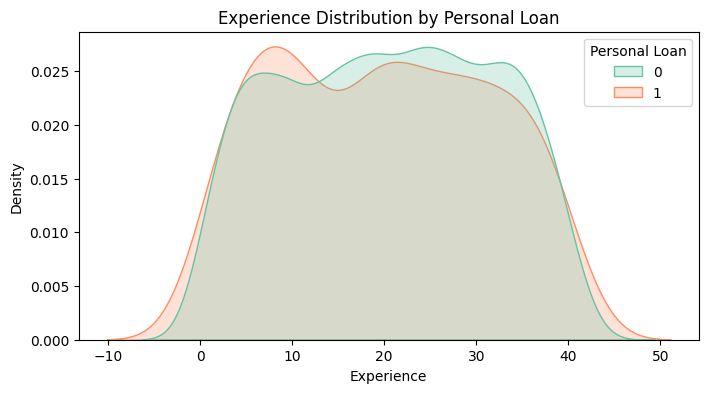

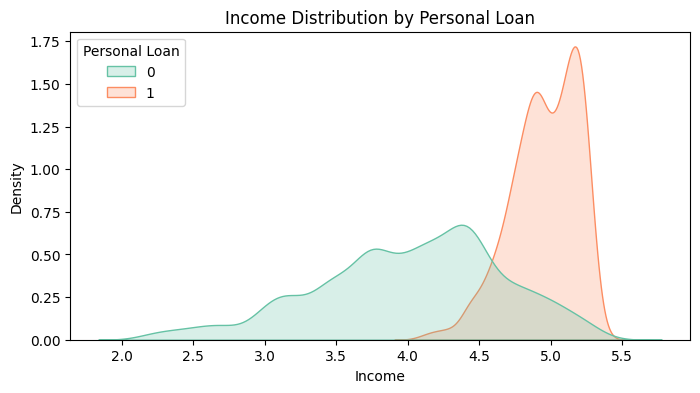

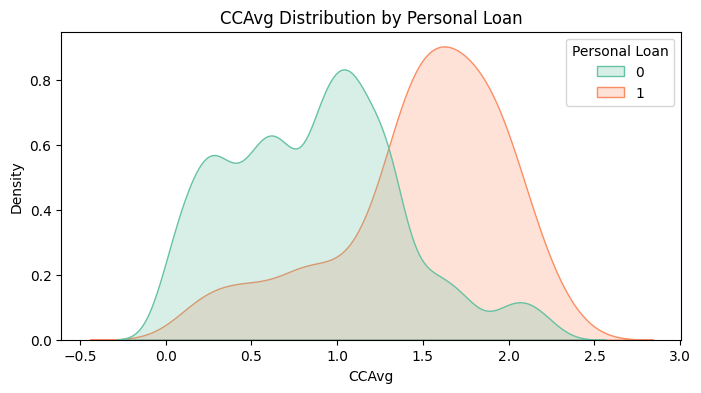

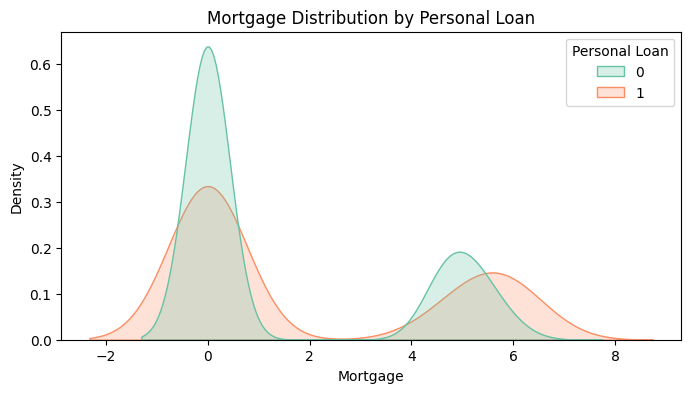

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Numerical features to analyze
numeric_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Categorical/Binary features
categorical_features = ['Family', 'Education', 'Securities Account', 'CD Account', 
                        'Online', 'CreditCard', 'HasMortgage']

# 1. Numerical features vs. target
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='Personal Loan', fill=True, common_norm=False, palette='Set2')
    plt.title(f'{col} Distribution by Personal Loan')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


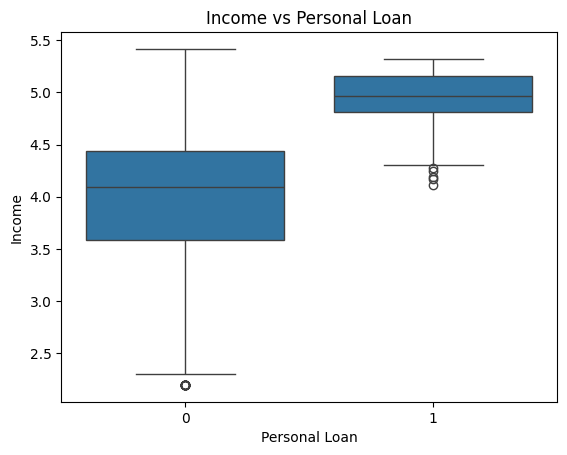

In [89]:
sns.boxplot(data=df, x='Personal Loan', y='Income')
plt.title("Income vs Personal Loan")
plt.show()


In [90]:
# Group statistics
group_stats = df.groupby('Personal Loan').mean(numeric_only=True).T
group_stats['Diff'] = group_stats[1] - group_stats[0]
group_stats.sort_values('Diff', ascending=False)


Personal Loan,0,1,Diff
Income,4.015886,4.956066,0.940180
CCAvg,0.869209,1.478678,0.609470
Mortgage,1.531679,1.937030,0.405351
Education,1.840868,2.233333,0.392465
CD Account,0.036258,0.291667,0.255409
Family,2.367726,2.612500,0.244774
HasMortgage,0.303939,0.350000,0.046061
Securities Account,0.102059,0.125000,0.022941
Online,0.596016,0.606250,0.010234
CreditCard,0.293644,0.297917,0.004273


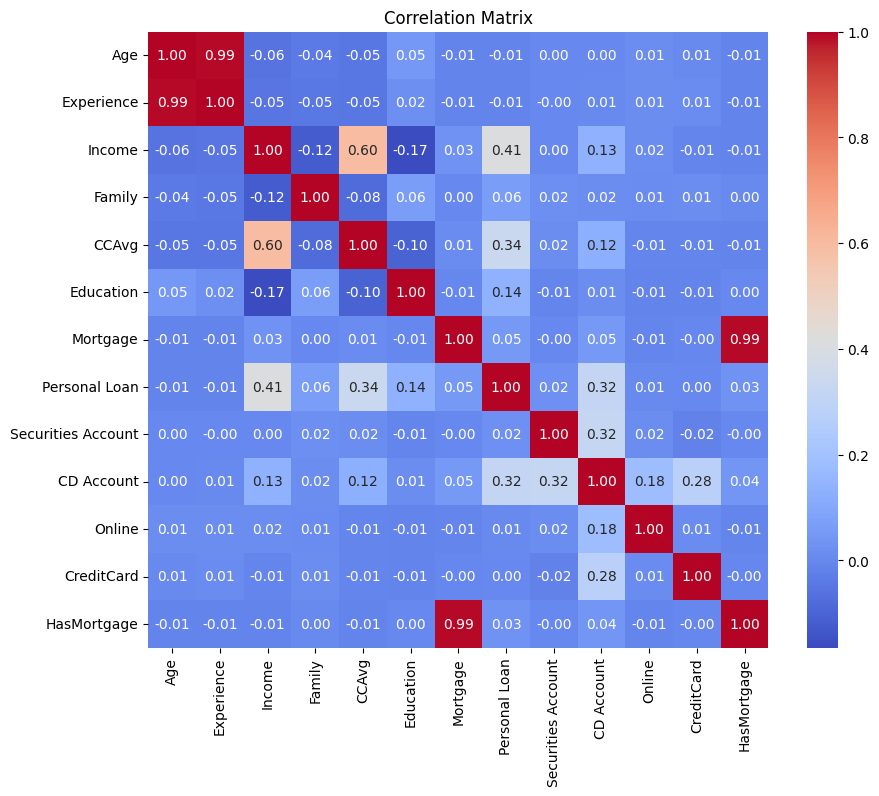

In [91]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [92]:
# Drop highly correlated/redundant features
df.drop(columns=['Experience', 'Mortgage'], inplace=True)

# Confirm changes
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'HasMortgage']


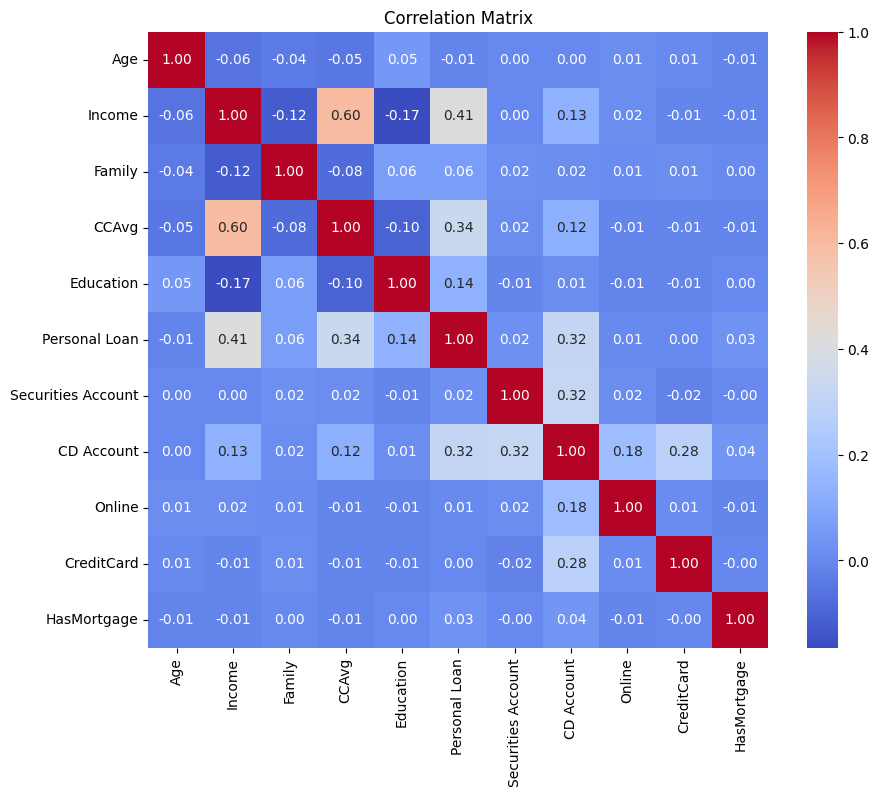

In [93]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [100]:
X

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,HasMortgage
0,25,3.912023,4,0.955511,1,1,0,0,0,0
1,45,3.555348,3,0.916291,1,1,0,0,0,0
2,39,2.484907,1,0.693147,1,0,0,0,0,0
3,35,4.615121,1,1.308333,2,0,0,0,0,0
4,35,3.828641,4,0.693147,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,29,3.713572,1,1.064711,3,0,0,1,0,0
4996,30,2.772589,4,0.336472,1,0,0,1,0,1
4997,63,3.218876,2,0.262364,3,0,0,0,0,0
4998,65,3.912023,3,0.405465,2,0,0,1,0,0


NameError: name 'X' is not defined

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def split_data(df, target_col, test_size=0.3, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def create_pipeline():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    return pipe

def perform_grid_search(pipe, X_train, y_train, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1):
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs,
        verbose=verbose
    )
    grid_search.fit(X_train, y_train)
    return grid_search

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("\nTest Set Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Usage example
if __name__ == "__main__":
    # Parameters
    TARGET_COL = 'Personal Loan'
    PARAM_GRID = {
        'rf__n_estimators': [100, 200],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5],
        'rf__min_samples_leaf': [1, 2]
    }

    # Split the data
    X_train, X_test, y_train, y_test = split_data(df, TARGET_COL)

    # Create pipeline
    pipeline = create_pipeline()

    # Grid search
    grid_search = perform_grid_search(pipeline, X_train, y_train, PARAM_GRID)

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best CV AUC: {grid_search.best_score_:.4f}")

    # Evaluate on test set
    evaluate_model(grid_search.best_estimator_, X_test, y_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best CV AUC: 0.9955

Test Set Metrics:
Accuracy: 0.9873
Precision: 0.9771
Recall: 0.8889
F1 Score: 0.9309
ROC AUC: 0.9983

Confusion Matrix:
[[1353    3]
 [  16  128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.89      0.93       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [6]:
import pickle

# Save the best estimator
with open('best_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

print("Model saved to best_model.pkl")


Model saved to best_model.pkl


In [99]:
from sklearn.linear_model import LogisticRegression

# Define a pipeline for logistic regression
def create_logistic_pipeline():
    return Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(solver='liblinear'))  # liblinear is good for small binary datasets
    ])

# Define a hyperparameter grid for logistic regression
LOGISTIC_PARAM_GRID = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2']
}

# Usage example for logistic regression
if __name__ == "__main__":
    # Parameters
    TARGET_COL = 'Personal Loan'

    # Split the data
    X_train, X_test, y_train, y_test = split_data(df, TARGET_COL)

    # Create logistic regression pipeline
    logistic_pipeline = create_logistic_pipeline()

    # Perform grid search
    grid_search_logistic = perform_grid_search(
        logistic_pipeline, X_train, y_train, LOGISTIC_PARAM_GRID
    )

    print(f"\n[Logistic Regression] Best Parameters: {grid_search_logistic.best_params_}")
    print(f"[Logistic Regression] Best CV AUC: {grid_search_logistic.best_score_:.4f}")

    # Evaluate the logistic model
    evaluate_model(grid_search_logistic.best_estimator_, X_test, y_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits

[Logistic Regression] Best Parameters: {'lr__C': 10, 'lr__penalty': 'l1'}
[Logistic Regression] Best CV AUC: 0.9663


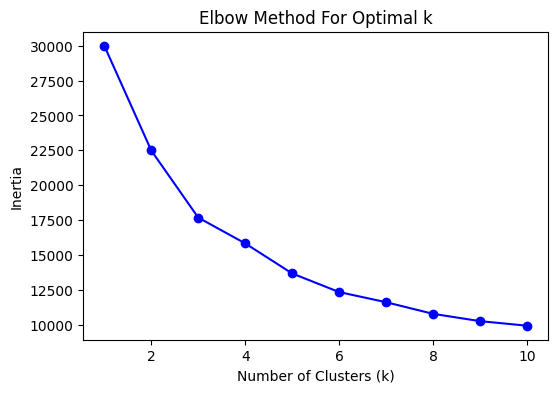

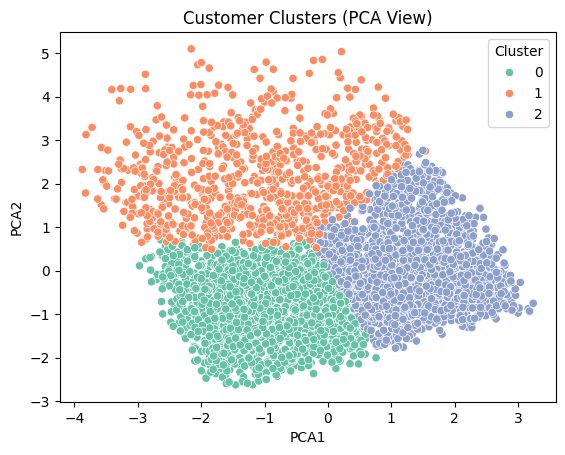


Cluster Profile:
               Age  Experience      Income     CCAvg  Education    Mortgage  \
Cluster                                                                       
0        35.152442    9.906759   60.068574  1.385363   1.947706   44.556487   
1        43.739976   18.709599  147.212637  4.803475   1.511543  117.230863   
2        55.553488   30.253023   58.584186  1.362000   1.959535   44.510233   

         Personal Loan  
Cluster                 
0             0.037000  
1             0.380316  
2             0.042791  


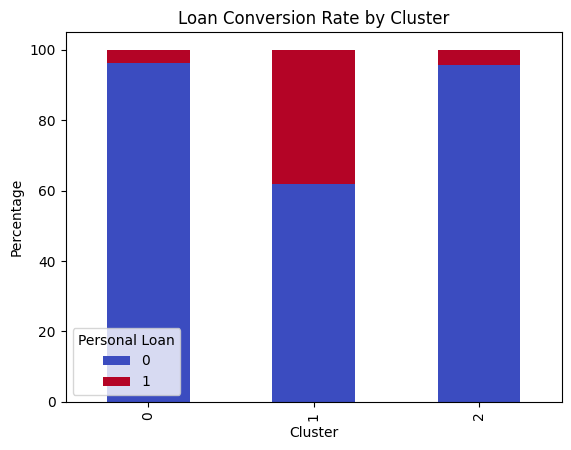

Silhouette Score: 0.270
Calinski-Harabasz Score: 1742.03
Davies-Bouldin Score: 1.330

Classification Metrics:
Accuracy : 0.8646
Precision: 0.3803
Recall   : 0.6521
F1 Score : 0.4804


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,accuracy_score, precision_score, recall_score, f1_score

def preprocess_data(df, features):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    return X_scaled
 
def find_optimal_k(X_scaled, max_k=10):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, max_k + 1), inertia, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()
 
def apply_kmeans(df, X_scaled, k, features):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    return df
 
def apply_pca_and_plot(df, X_scaled):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
    plt.title('Customer Clusters (PCA View)')
    plt.show()
 
def cluster_summary(df, features):
    profile = df.groupby('Cluster')[features + ['Personal Loan']].mean()
    print("\nCluster Profile:")
    print(profile)
    return profile
 
def plot_cluster_loan_conversion(df):
    loan_dist = pd.crosstab(df['Cluster'], df['Personal Loan'], normalize='index') * 100
    loan_dist.plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title('Loan Conversion Rate by Cluster')
    plt.ylabel('Percentage')
    plt.show()
 
def evaluate_clustering(X_scaled, labels):
    sil = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"Silhouette Score: {sil:.3f}")
    print(f"Calinski-Harabasz Score: {ch:.2f}")
    print(f"Davies-Bouldin Score: {db:.3f}")
 
def main(filepath):
    features = ['Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage']
    df = load_data(filepath)
    X_scaled = preprocess_data(df, features)
    find_optimal_k(X_scaled)
    df = apply_kmeans(df, X_scaled, k=3, features=features)
    apply_pca_and_plot(df, X_scaled)
    cluster_summary(df, features)
    plot_cluster_loan_conversion(df)
    evaluate_clustering(X_scaled, df['Cluster'])
    print_classification_metrics(df)
 
 
def print_classification_metrics(df):
    cluster_loan_counts = pd.crosstab(df['Cluster'], df['Personal Loan'])
    loan_cluster = cluster_loan_counts[1].idxmax()
 
    df['Predicted_Loan'] = (df['Cluster'] == loan_cluster).astype(int)
 
    y_true = df['Personal Loan']
    y_pred = df['Predicted_Loan']
 
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
 
    print("\nClassification Metrics:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
 
 
if __name__ == "__main__":
    main("Bank_Personal_Loan_Modelling.csv")